<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>



# Simple Linear Regression

 In this notebook, we will explore the concept of simple linear regression and its application in construction. Linear regression is a statistical technique that allows us to understand the relationship between a dependent variable and one independent variable. We will learn how to build a linear regression model, interpret the results, and make predictions. This knowledge will enable the construction workforce to analyze and predict various construction-related factors, such as the compressive strength of concrete, based on historical data.

### Objectives:


After completing this lab, you will have achieved the following:

-  Implement simple Linear Regression using scikit-learn.
-  Create a regression model.
-  Train the regression model on a dataset.
-  Test the regression model using the test dataset.
-  Utilize the trained model for making predictions.

By mastering these concepts and techniques, you will gain valuable skills in implementing and utilizing Linear Regression models for predictive analysis.

### Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the construction dataset

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/Concrete_Data.csv'
df = pd.read_csv(url)

### Step 3: Explore the dataset

In [ ]:
# Display the first few rows of the dataset
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### `Concrete_Data.csv`:

The regression problem focuses on predicting the concrete compressive strength using its components as well as its age. The variables are listed in the same order as the numerical values in the database rows.

    Name -- Data Type -- Measurement -- Description
1.   **Cement** -- quantitative -- kg in a m3 mixture -- Input Variable
2.   **Blast Furnace Slag** -- quantitative -- kg in a m3 mixture -- Input Variable
3.   **Fly Ash** -- quantitative -- kg in a m3 mixture -- Input Variable
4.   **Water** -- quantitative -- kg in a m3 mixture -- Input Variable
5.   **Superplasticizer** -- quantitative -- kg in a m3 mixture -- Input Variable
6.   **Coarse Aggregate** -- quantitative -- kg in a m3 mixture -- Input Variable
7.   **Fine Aggregate** -- quantitative -- kg in a m3 mixture -- Input Variable
8.   **Age** -- quantitative -- Day (1~365) -- Input Variable
9.   **Concrete compressive strength** -- quantitative -- MPa -- Output Variable


[`Data source`](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

### Step 4: Data analysis
Let's begin by performing a descriptive exploration of our data.

In [ ]:
# Generates a statistical summary of the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Next, we will select a few features to explore in more detail.


In [ ]:
selected_features = df[['water', 'cement', 'coarseaggregate', 'csMPa']]
selected_features.head(10)

,water,cement,coarseaggregate,csMPa
0,162.0,540.0,1040.0,79.99
1,162.0,540.0,1055.0,61.89
2,228.0,332.5,932.0,40.27
3,228.0,332.5,932.0,41.05
4,192.0,198.6,978.4,44.30
5,228.0,266.0,932.0,47.03
6,228.0,380.0,932.0,43.70
7,228.0,380.0,932.0,36.45
8,228.0,266.0,932.0,45.85
9,228.0,475.0,932.0,39.29


We can now visualize the distribution of each selected feature.

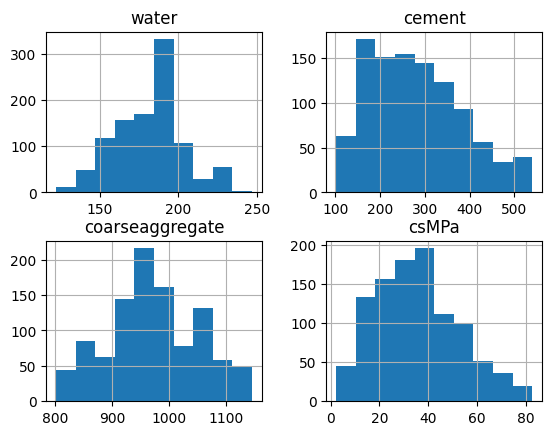

In [ ]:
selected_features.hist()
plt.show()

Now, let's examine the relationship between each feature and the compressive strength of the sample.

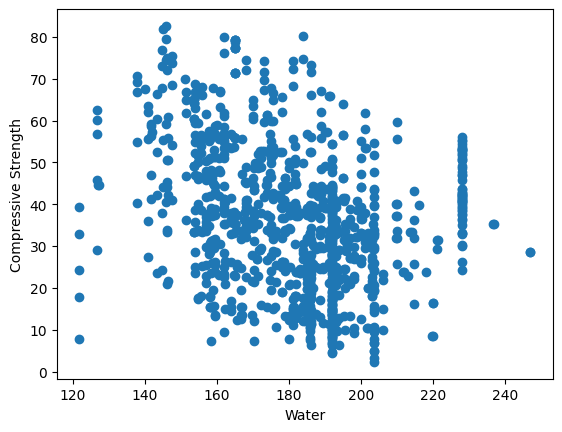

In [ ]:
plt.scatter(df.water, df.csMPa)
plt.xlabel("Water")
plt.ylabel("Compressive Strength")
plt.show()

## Practice

To assess the linearity of the relationship between **cement** and **compressive strength**, let's create a plot of the two variables.

In [ ]:
# write your answer code here:





<details><summary>Click here for the answer</summary>

```python    
plt.scatter(df.cement, df.csMPa)
plt.xlabel("Cement")
plt.ylabel("Compressive Strength")
plt.show()

```

</details>

## Practice

To assess the linearity of the relationship between **coarse aggregate** and **compressive strength**, let's create a plot of the two variables.

In [ ]:
# write your answer code here:





<details><summary>Click here for the answer</summary>

```python    
plt.scatter(df.coarseaggregate, df.csMPa)
plt.xlabel("Coarse Aggregate")
plt.ylabel("Compressive Strength")
plt.show()

```

</details>

### Step 5: Create train and test datasets
In this section, we first assign the input features to X and the target variable to y. Next, we split the data into train and test sets using train_test_split from sklearn.model_selection.

You can always adjust the test_size parameter as per your preference. In this code, we set `test_size=0.2`. Therefore, 20% of the data would be saved as the test dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into input features (X) and target variable (y)
X = df.drop('csMPa', axis=1)
y = df['csMPa']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Training the model
Now let's move on to creating a simple regression model and training it on the training dataset.

We first import LinearRegression from sklearn.linear_model. We then create an instance of the linear regression model and assign it to the variable model. Finally, we fit the model to the 'cement' attribute and y from training data using the fit method.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train[['cement']], y_train)
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [0.07789607]
Intercept:  13.785171881915776


**Note**: The Coefficient and Intercept are the parameters for the fitted line in a simple linear regression.

### Step 7: Plotting the model
Now, let's plot the outputs of our regression model.

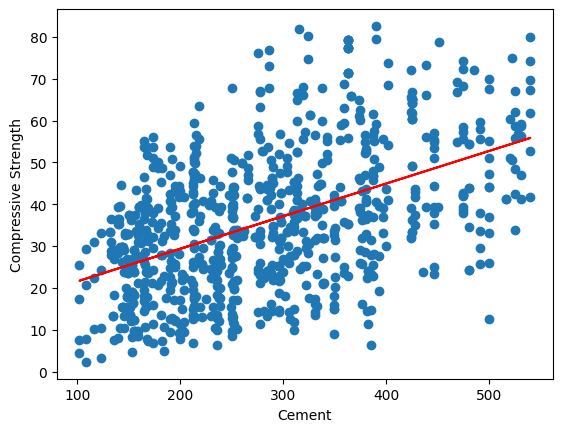

In [ ]:
plt.scatter(X_train[['cement']], y_train)
plt.xlabel("Cement")
plt.ylabel("Compressive Strength")
plt.plot(X_train[['cement']], model.coef_[0]*X_train[['cement']] + model.intercept_, '-r');

### Step 8: Evaluation of the model
Finally, let's evaluate the performance of our regression model.

In order to assess the performance of our regression model, we calculate several evaluation metrics based on a comparison between the predicted values and the actual values from the test set.

1.   **Mean Absolute Error (MAE)**: MAE represents the average absolute difference between the predicted and actual values. It provides a measure of the average magnitude of errors, without considering their direction. Lower MAE values indicate better model performance.

2.   **Mean Squared Error (MSE)**: MSE calculates the average of the squared differences between the predicted and actual values. By squaring the errors, MSE emphasizes larger errors and penalizes them more than smaller errors. It is a popular metric, especially when dealing with outliers or larger errors. Like MAE, lower MSE values indicate better model performance.

3.   **Root Mean Squared Error (RMSE)**: RMSE is the square root of MSE and provides an interpretable scale that is in the same unit as the target variable. It represents the average magnitude of errors and is often preferred when the focus is on the interpretability of the error metric.

4.   **R-squared (R2) score**: R-squared measures the proportion of the variance in the target variable that can be explained by the regression model. It ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating that the model does not explain any of the variability in the data. R2 is a useful metric for understanding how well the model fits the data, but it should be used in conjunction with other metrics to assess the overall performance.

By calculating and examining these evaluation metrics, we gain insights into the accuracy and performance of our regression model. Lower values of MAE, MSE, and RMSE, and higher values of R2 indicate better model performance.

In [ ]:
from sklearn.metrics import r2_score

# Predict on the test data
y_pred = model.predict(X_test[['cement']])

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.absolute(y_test - y_pred))

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) score:', r2)

Mean Absolute Error (MAE): 11.55561279863471
Mean Squared Error (MSE): 192.78479855432548
Root Mean Squared Error (RMSE): 13.884696559677689
R-squared (R2) score: 0.25183513628298093


**Did you know?**

There are readily available functions, offered by `sklearn`, to calculate mean absolute error and mean squared error, which can be used to calculate these evaluation metrics directly without the need for manual calculations:
```python    
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
```

### **Conclusion**
As you can see, the linear regression model shows some predictive capability for the given data. However, the evaluation metrics, including MAE, MSE, RMSE, and R2 score, suggest that there is room for improvement.

 The magnitude of errors, as indicated by the MAE, MSE, and RMSE, highlights the model's limitations in accurately predicting the compressive strength of concrete based on its attributes. Additionally, the relatively low R2 score suggests that the model's ability to explain the variability in the data is limited.

Further refinement of the model or exploration of **alternative models** may be necessary to enhance the predictive performance and better capture the complexity of the relationship between the cement attributes and compressive strength.

## Practice

Let's examine the evaluation metrics obtained when training a regression model  using the `water` feature.

You have to train a Linear Regression Model (model2) using `X_train[['water']]` and `y_train`.

In [ ]:
# Create another linear regression model
model2 = LinearRegression()

# Fit the model to the training data
# YOUR CODE

<details><summary>Click here for the answer</summary>

```python    
# Create another linear regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train[['water']], y_train)
```

</details>

Obtain the predictions by using the `predict` function of the model and the `X_test[['water']]`  data.

In [ ]:
# Predict on the test data
y_pred2 = # YOUR CODE

<details><summary>Click here for the answer</summary>

```python    
# Predict on the test data
y_pred2 = model2.predict(X_test[['water']])
```

</details>

Lastly, calculate the four evaluation metrics by utilizing `y_pred2 ` and `y_test` data. This can be done by applying the `np.absolute` and `np.mean` functions to obtain the absolute differences between the predicted values and the actual values, and then to calculate the average of these absolute differences.

In [ ]:
# YOUR CODE:
mae = # YOUR CODE
mse = # YOUR CODE
rmse = # YOUR CODE
r2 = # YOUR CODE
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) score:', r2)

<details><summary>Click here for the answer</summary>

``` python
mae = np.mean(np.absolute(y_test - y_pred2))
mse = np.mean((y_test - y_pred2) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) score:', r2)
```

</details>

We can see that the new model works worse than the previous model.

### Thank you and good luck!